In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
data = pd.read_excel('AirQualityUCI.xlsx',parse_dates = [['Date','Time']])

In [93]:
data.columns

Index(['Date_Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [94]:
data = data.set_index('Date_Time')
data.head(3)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.9,53.975000,0.750239


In [105]:
data.loc[data['CO(GT)'] == -200, 'CO(GT)'] = 2.5
co_data = pd.DataFrame(data['CO(GT)'],columns = ['CO(GT)'])
co_data.head()

,CO(GT)
Date_Time,
2004-03-10 18:00:00,2.6
2004-03-10 19:00:00,2.0
2004-03-10 20:00:00,2.2
2004-03-10 21:00:00,2.2
2004-03-10 22:00:00,1.6


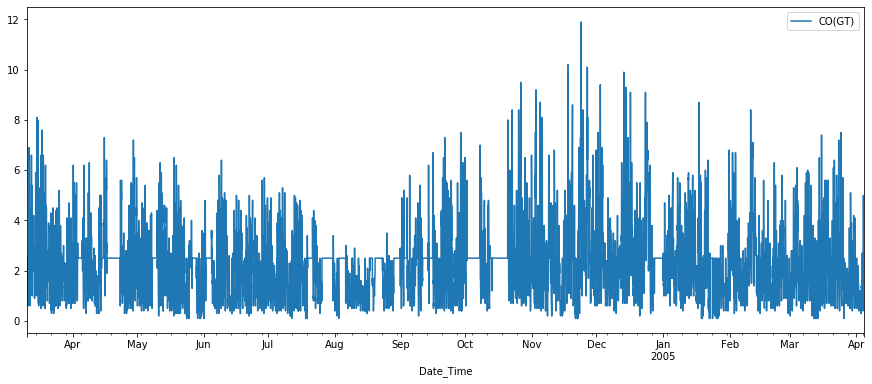

In [106]:
co_data.plot(figsize = (15,6))

In [107]:
co_data.index

DatetimeIndex(['2004-03-10 18:00:00', '2004-03-10 19:00:00',
               '2004-03-10 20:00:00', '2004-03-10 21:00:00',
               '2004-03-10 22:00:00', '2004-03-10 23:00:00',
               '2004-03-11 00:00:00', '2004-03-11 01:00:00',
               '2004-03-11 02:00:00', '2004-03-11 03:00:00',
               ...
               '2005-04-04 05:00:00', '2005-04-04 06:00:00',
               '2005-04-04 07:00:00', '2005-04-04 08:00:00',
               '2005-04-04 09:00:00', '2005-04-04 10:00:00',
               '2005-04-04 11:00:00', '2005-04-04 12:00:00',
               '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
              dtype='datetime64[ns]', name='Date_Time', length=9357, freq='H')

In [108]:
co_data.index.freq = 'H'

In [109]:
co_data.head()

,CO(GT)
Date_Time,
2004-03-10 18:00:00,2.6
2004-03-10 19:00:00,2.0
2004-03-10 20:00:00,2.2
2004-03-10 21:00:00,2.2
2004-03-10 22:00:00,1.6


In [111]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [112]:
span = 12
alpha = 2/(span + 1)

In [113]:
co_data['EWMA12'] = co_data['CO(GT)'].ewm(alpha = alpha,adjust = False).mean()

In [114]:
co_data.head()

,CO(GT),EWMA12
Date_Time,,
2004-03-10 18:00:00,2.6,2.600000
2004-03-10 19:00:00,2.0,2.507692
2004-03-10 20:00:00,2.2,2.460355
2004-03-10 21:00:00,2.2,2.420300
2004-03-10 22:00:00,1.6,2.294100


In [115]:
model = SimpleExpSmoothing(co_data['CO(GT)'])

In [118]:
fitted_model = model.fit(smoothing_level = alpha,optimized = False)

In [123]:
co_data['SES'] = fitted_model.fittedvalues.shift(-1)

In [124]:
co_data.head()

,CO(GT),EWMA12,SES
Date_Time,,,
2004-03-10 18:00:00,2.6,2.600000,2.600000
2004-03-10 19:00:00,2.0,2.507692,2.507692
2004-03-10 20:00:00,2.2,2.460355,2.460355
2004-03-10 21:00:00,2.2,2.420300,2.420300
2004-03-10 22:00:00,1.6,2.294100,2.294100


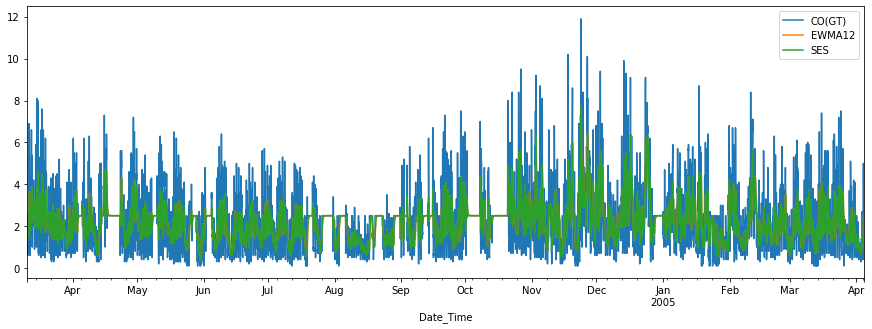

In [126]:
co_data.plot(figsize = (15,5))

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing